<a href="https://colab.research.google.com/github/Shk-tech/my-colab-learning-material/blob/main/lms_ransac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
r = 5
a = 10
b = 7

In [ ]:
theta = np.random.rand(100, 1) * np.pi * 2
x = r * np.cos(theta) + a + np.random.randn(100, 1) * 0.5
y = r * np.sin(theta) + b + np.random.randn(100, 1) * 0.5

nx = np.random.rand(50, 1) * 20 + (a - 10) + np.random.randn(50, 1)
ny = b + r *1.2 -np.random.randn(50, 1)

x = np.r_[x, nx]
y = np.r_[y, ny]

(3.0, 18.0, 0.0, 15.0)

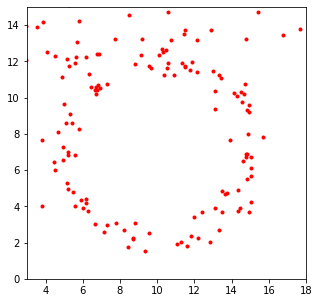

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(x, y, 'r.')
plt.axis([3, 18, 0, 15])

In [ ]:
A = np.c_[-2*x, -2*y, np.ones(x.shape)]
B = -(x**2)-(y**2)
estimate, _, _, _= np.linalg.lstsq(A, B, rcond=None)
ea, eb, ec = estimate
er = np.sqrt(ea ** 2 + eb ** 2 - ec)
ea, eb, er

(array([10.33957434]), array([8.87725364]), array([5.97599211]))

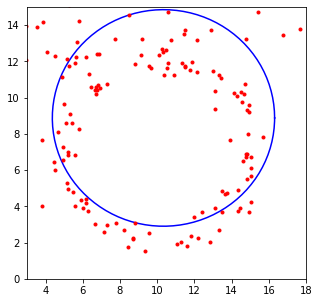

In [ ]:
theta = np.linspace(0, 2 * np.pi, 200)
ex = er * np.cos(theta) + ea
ey = er * np.sin(theta) + eb

plt.figure(figsize=(5, 5))
plt.plot(ex, ey, 'b-')
plt.plot(x, y, 'r.')
plt.axis([3, 18, 0, 15])
plt.show()

In [ ]:
np.linspace(0, 1, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [ ]:
class Circle:
    def __init__(self, a=0, b=0, r=0):
        self.a = a
        self.b = b
        self.r = r

    def get_dist(self, p): # p == (x, y)
        d = np.sqrt((self.a - p[0]) ** 2 + (self.b - p[1]) ** 2)
        return abs(d - self.r)

    def set(self, x, y):
        A = np.c_[-2*x, -2*y, np.ones((100, 1))]
        B = -(x**2)-(y**2)
        estimate, _, _, _= np.linalg.lstsq(A, B, rcond=None)
        ea, eb, ec = estimate
        er = np.sqrt(ea ** 2 + eb ** 2 - ec)
        ea, eb, er
        self.a = ea
        self.b = eb
        self.r = er




In [ ]:
def get_circle(x, y):
    A = np.c_[-2*x, -2*y, np.ones(x.shape)]
    B = -(x**2)-(y**2)
    estimate, _, _, _= np.linalg.lstsq(A, B, rcond=None)
    ea, eb, ec = estimate
    er = np.sqrt(ea ** 2 + eb ** 2 - ec)
    return (ea, eb, er)

In [ ]:
def draw_circle(a, b, r, option='b-'):
    theta = np.linspace(0, 2 * np.pi, 200)
    ex = r * np.cos(theta) + a
    ey = r * np.sin(theta) + b
    plt.plot(ex, ey, option)
    plt.plot(x, y, 'r.')



In [ ]:
iter = 1000
k = 3
th = 2

max_inlier = None
max_inlier_count = 0
for _ in range(1000):
    rand_index = np.random.permutation(len(x))[:k]
    rx = x[rand_index]
    ry = y[rand_index]
    rmodel = get_circle(rx, ry)
    ra, rb, rr = rmodel
    d = abs(np.sqrt((ra - x) ** 2 + (rb - y) ** 2) - rr)
    inlier = d < th
    if sum(inlier) > max_inlier_count:
        max_inlier_count = sum(inlier)
        max_inlier = inlier
    ###############################################
    # draw_circle(*rmodel)
    # ix = x[inlier]
    # iy = y[inlier]
    # plt.plot(ix, iy, 'g.')
    # plt.show()
    # input()


####
final_model = get_circle(x[max_inlier], y[max_inlier])



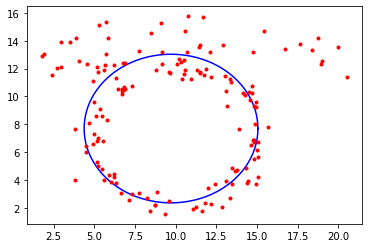

In [ ]:
draw_circle(*final_model)

In [ ]:
src = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

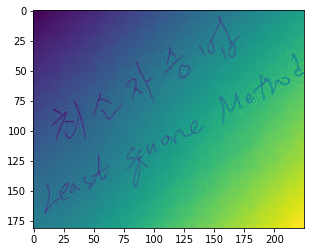

In [ ]:
plt.imshow(src)

In [ ]:
m = src.shape[0] * src.shape[1]

In [ ]:
x = list(range(0, src.shape[1])) * 181
x = np.array(x).reshape(m, 1)

In [ ]:
y = [[y] * src.shape[1] for y in range(src.shape[0])]
y = np.array(y).reshape(m, 1)

In [ ]:
v = src.reshape(m, 1)

In [ ]:
A = np.c_[x, y, np.ones((m, 1))]
B = v

In [ ]:
theta, _, _, _ = np.linalg.lstsq(A, B, None)

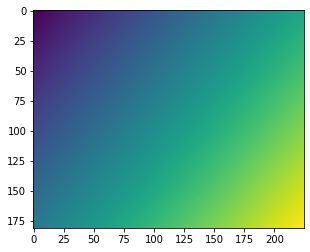

In [ ]:
back = (A @ theta).reshape(src.shape)
plt.imshow(back)

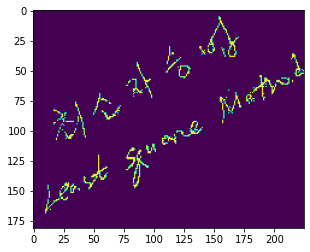

In [ ]:
plt.imshow(abs(src - back) > 20)